<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Shri Ramdeobaba College of Engineering and Management<br>Nagpur 440013</h1></center>
<center><h1 style="font-family: 'Inria Serif'; font-size:38px">Department of Computer Science Engineering (AIML)</h1></center>
<center><h2 style="font-family: 'Inria Serif'; font-size:32px">Data Analysis and Visualization Lab - Practical 7</h2></center>

<br>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Name : Pratik Agrawal</div>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Class : CSE AIML E4</div>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:22px">Roll No : 57</div>

<hr style="border:0px" />
<br/>
<br/>
<div class="text aim" style="font-family: 'Inria Serif'; font-size:28px">Aim : Implementation of Time Series Analysis to obtain the trend line and perform
forecasting using Python
</div>

### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">NAME : Rujuta Yugaonkar</div>
### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">ROLL : 17</div>
### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">SECT : CSE AIML</div>


## <div class="text" style="font-family: 'Inria Serif'; font-size:28px">Import Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [10]:
colors = [
    "#ffbe0b",
    "#fb5607",
    "#ff006e",
    "#8338ec",
    "#3a86ff"
]

sns.set_style('darkgrid')

## <div class="text" style="font-family: 'Inria Serif'; font-size:24px">1. Supermarket</div>

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">1.1. Load Dataset</div>

In [59]:
market_df = pd.read_csv('../data/superstore.csv', encoding='latin-1')

In [45]:
market_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [46]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [47]:
market_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [60]:
market_df['Order Date'] = pd.to_datetime(market_df['Order Date'], format='%d-%m-%Y')

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">1.1. Preprocessing</div>

In [73]:
# group sales by order month and give sum of sales of furniture in each year

furniture_df = market_df[market_df['Category'] == 'Furniture']

sales_per_month = furniture_df.groupby(furniture_df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

In [75]:
furniture_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,22-03-2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,10-12-2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,09-09-2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [76]:
sales_per_month

,Order Date,Sales
0,2014-01,6242.5250
1,2014-02,1839.6580
2,2014-03,14573.9560
3,2014-04,7944.8370
4,2014-05,6912.7870
5,2014-06,13206.1256
6,2014-07,10821.0510
7,2014-08,7320.3465
8,2014-09,23816.4808
9,2014-10,12304.2470


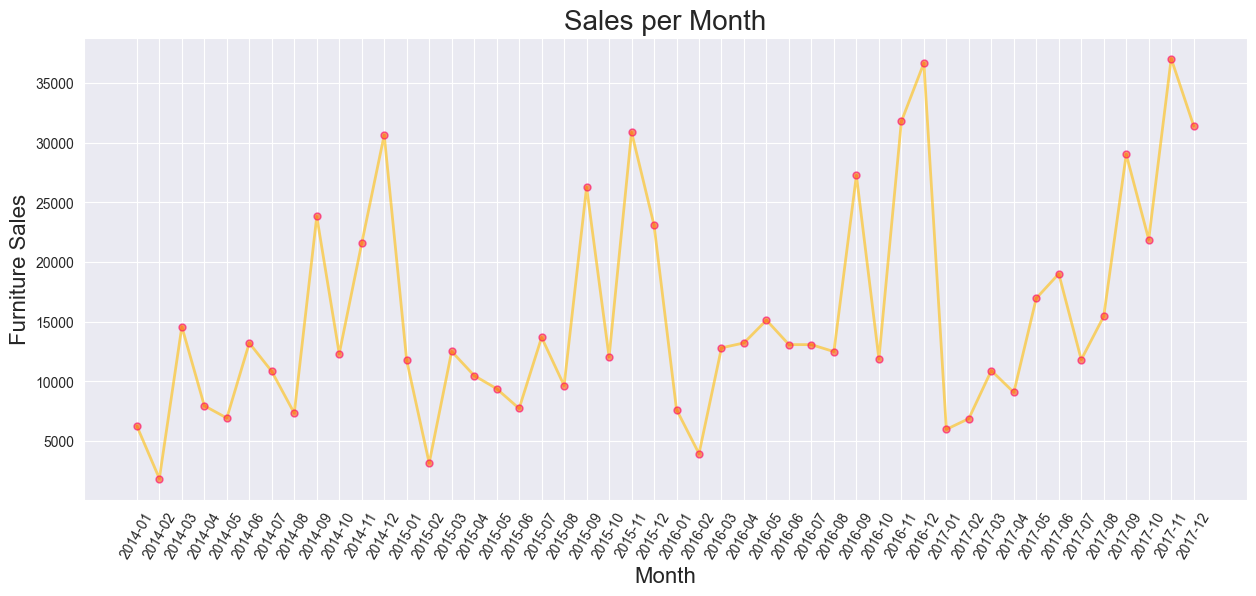

In [74]:
plt.figure(figsize=(15, 6))

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=sales_per_month['Sales'], color=colors[0], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Sales per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Furniture Sales', fontsize=16)

plt.xticks(rotation=60)

plt.show()

In [77]:
# group sales by order year and give sum of sales in each year

sales_per_year = furniture_df.groupby(furniture_df['Order Date'].dt.to_period('Y'))['Sales'].sum().reset_index()

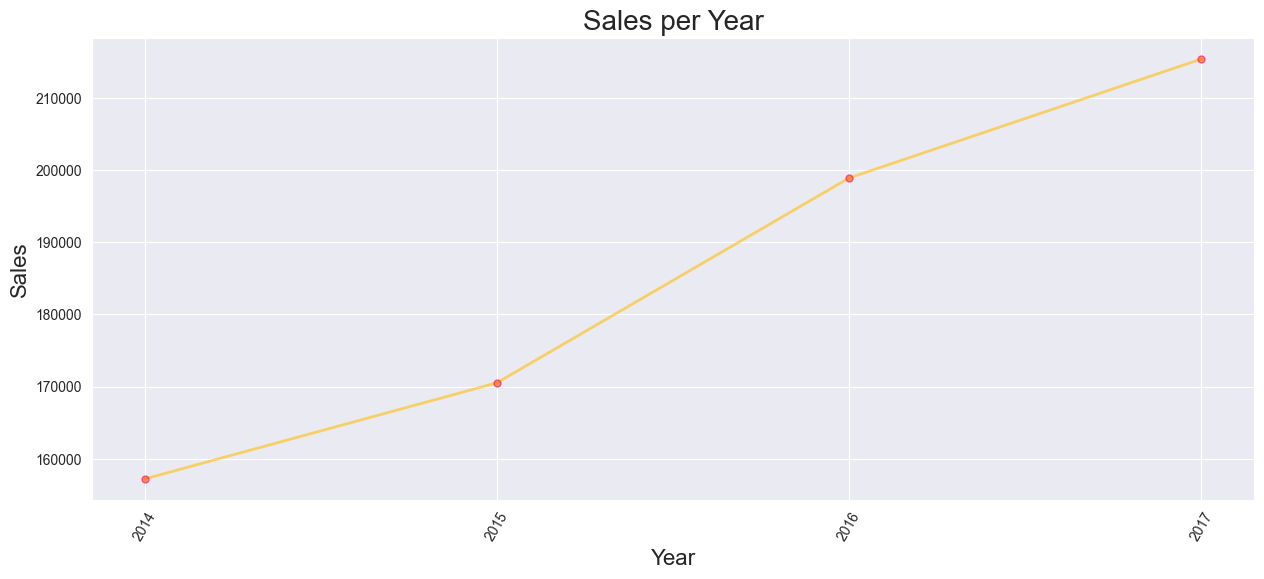

In [78]:
plt.figure(figsize=(15, 6))

sns.lineplot(x=sales_per_year['Order Date'].astype(str), y=sales_per_year['Sales'], color=colors[0], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Sales per Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Sales', fontsize=16)

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">1.2. Trend Analysis</div>

#### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">1.2.1. Free Hand Method</div>

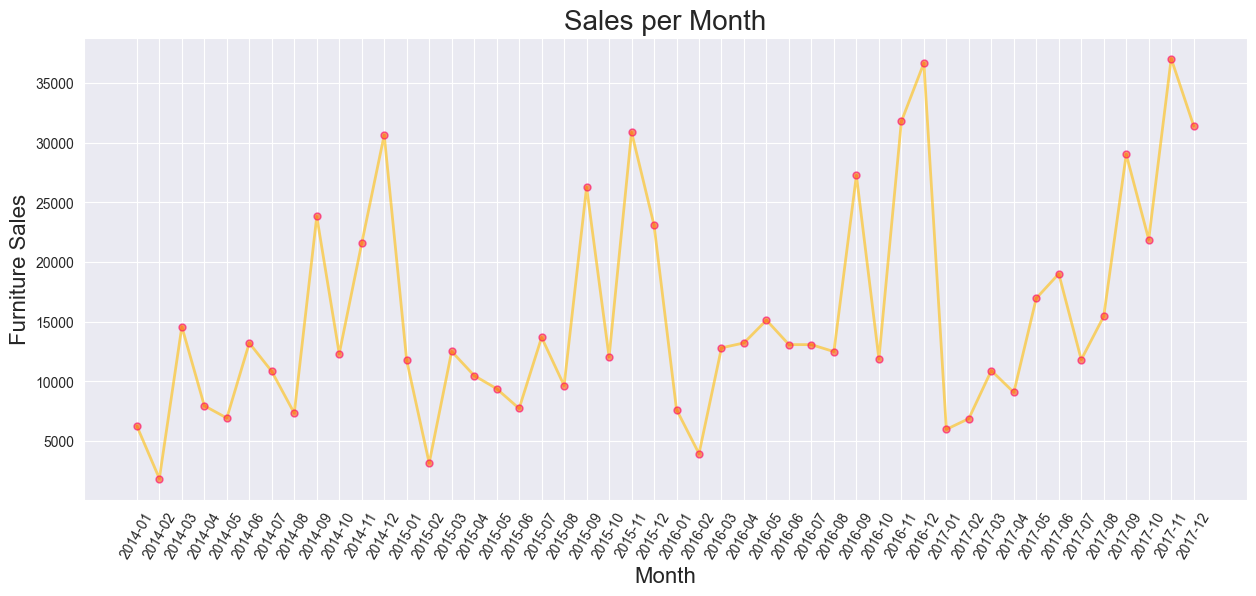

In [88]:
plt.figure(figsize=(15, 6))

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=sales_per_month['Sales'], color=colors[0], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Sales per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Furniture Sales', fontsize=16)

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">1.2.2. Moving Average</div>

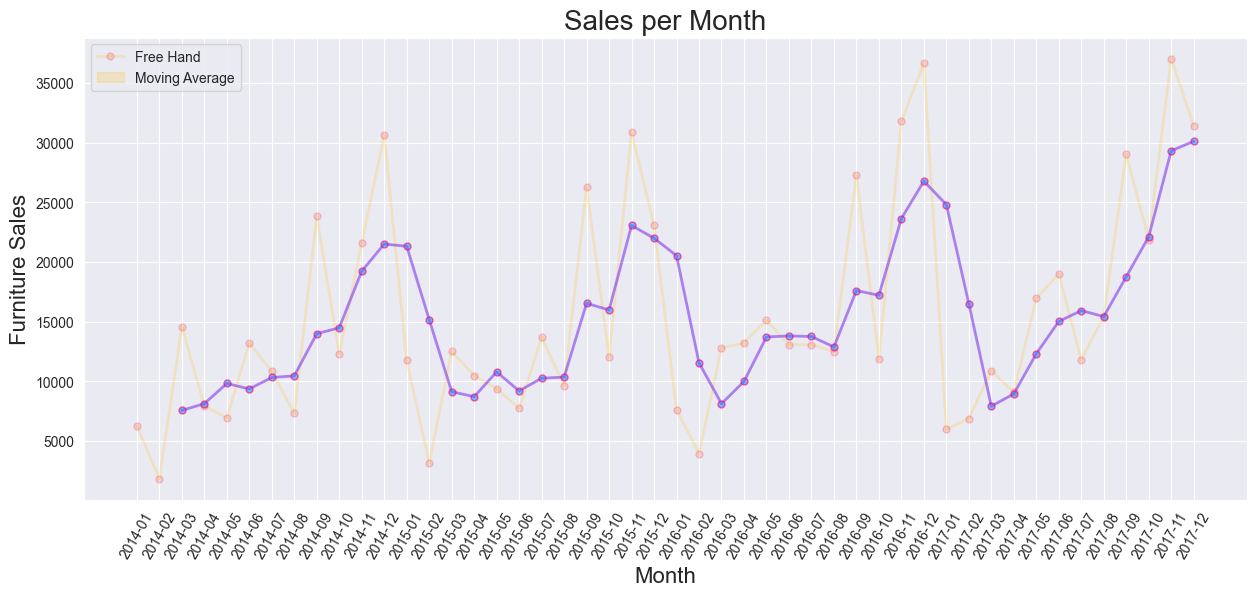

In [92]:
plt.figure(figsize=(15, 6))

window_size = 3

moving_average = sales_per_month['Sales'].rolling(window_size).mean()

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=sales_per_month['Sales'], color=colors[0], alpha=0.2, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=moving_average, color=colors[3], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[4], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Sales per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Furniture Sales', fontsize=16)

plt.legend(['Free Hand', 'Moving Average'])

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">1.2.3. Semi-Average Method</div>

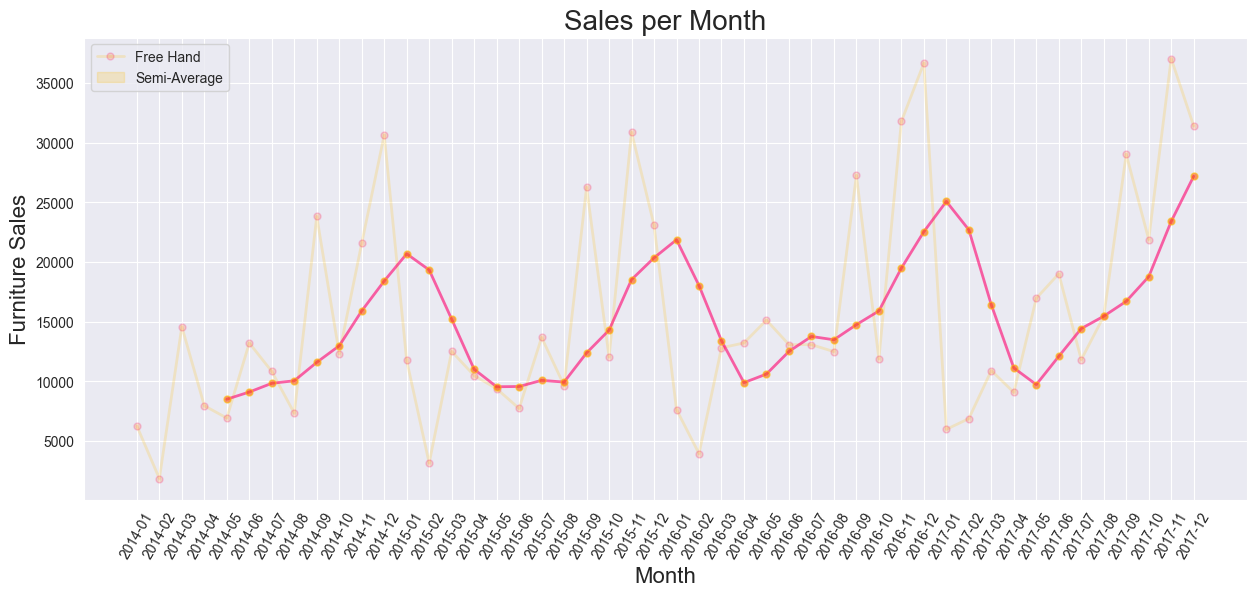

In [101]:
plt.figure(figsize=(15, 6))

window_size = 3
semi_average = sales_per_month['Sales'].rolling(window_size).mean().rolling(window_size).mean()

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=sales_per_month['Sales'], color=colors[0], alpha=0.2, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=semi_average, color=colors[2], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[0], linewidth=2)

plt.title('Sales per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Furniture Sales', fontsize=16)

plt.legend(['Free Hand', 'Semi-Average'])

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">1.2.4. Least Square Method</div>

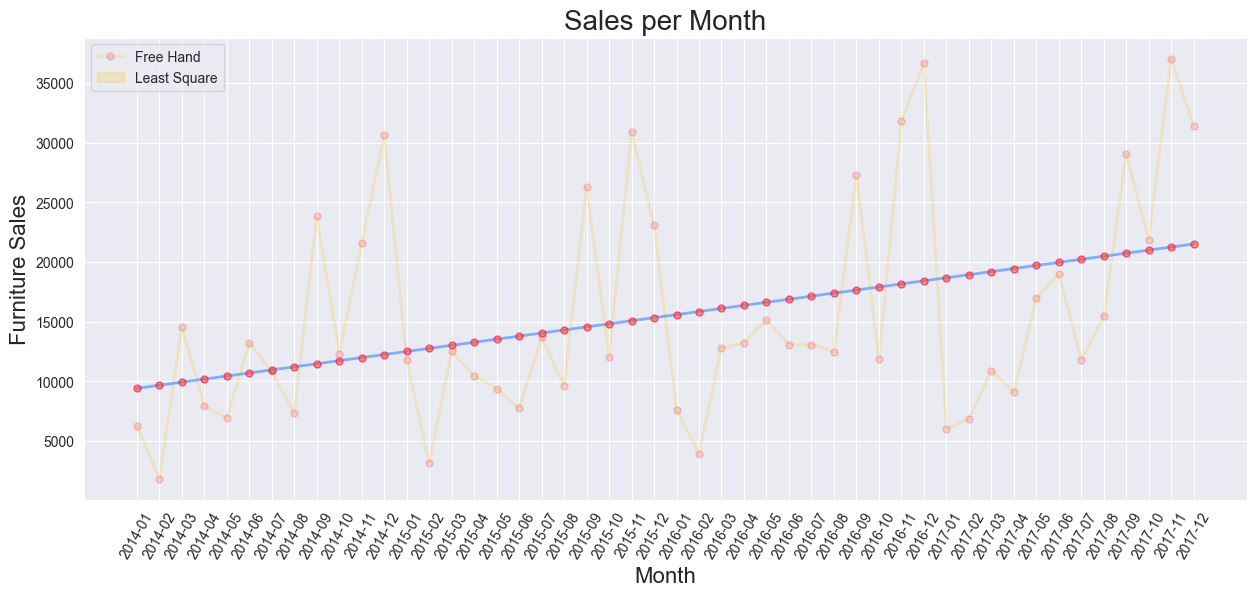

In [102]:
plt.figure(figsize=(15, 6))

x = np.arange(1, len(sales_per_month) + 1)
y = sales_per_month['Sales']

m, b = np.polyfit(x, y, 1)

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=sales_per_month['Sales'], color=colors[0], alpha=0.2, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

sns.lineplot(x=sales_per_month['Order Date'].astype(str), y=m*x + b, color=colors[4], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Sales per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Furniture Sales', fontsize=16)

plt.legend(['Free Hand', 'Least Square'])

plt.xticks(rotation=60)

plt.show()

## <div class="text" style="font-family: 'Inria Serif'; font-size:24px">2. Air Passengers</div>

### <div class="text" style="font-family: 'Inria Serif'; font-size:20px">2.1. Load Dataset</div>

In [103]:
airline_df = pd.read_csv('../data/airline.csv')

In [104]:
airline_df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [105]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [106]:
airline_df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [107]:
airline_df['Month'] = pd.to_datetime(airline_df['Month'], format='%Y-%m')

In [108]:
airline_df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


## <div class="text" style="font-family: 'Inria Serif'; font-size:20px">2.2. Trend Analysis</div>

### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">2.2.1. Free Hand Method</div>

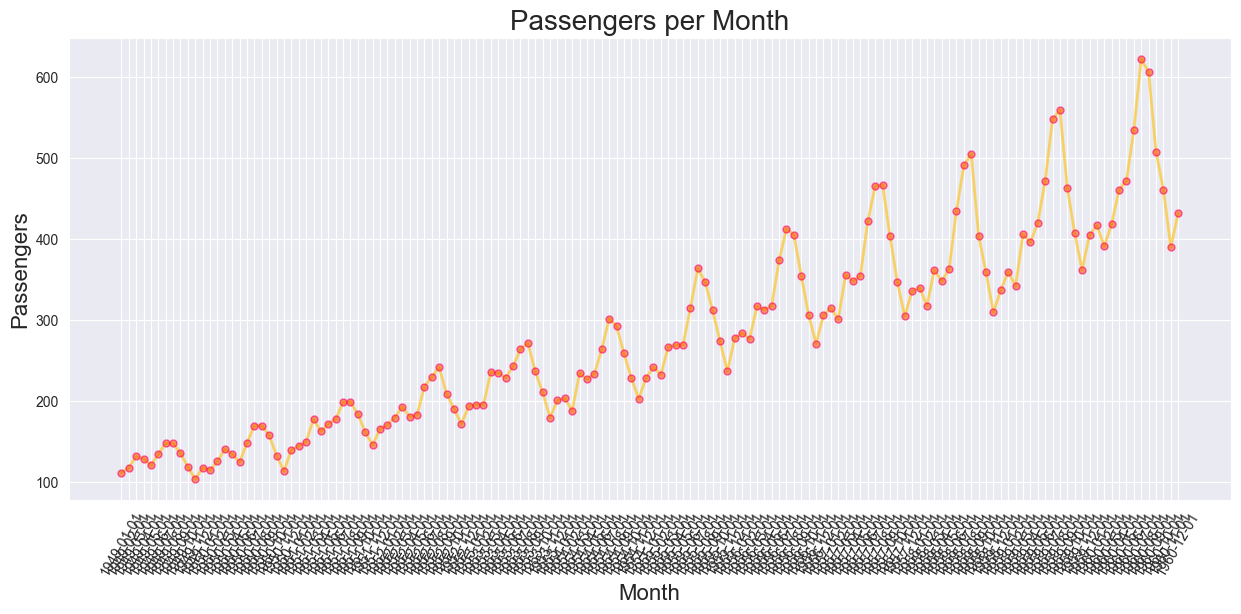

In [109]:
plt.figure(figsize=(15, 6))

sns.lineplot(x=airline_df['Month'].astype(str), y=airline_df['Passengers'], color=colors[0], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Passengers per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers', fontsize=16)

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">2.2.2. Moving Average</div>

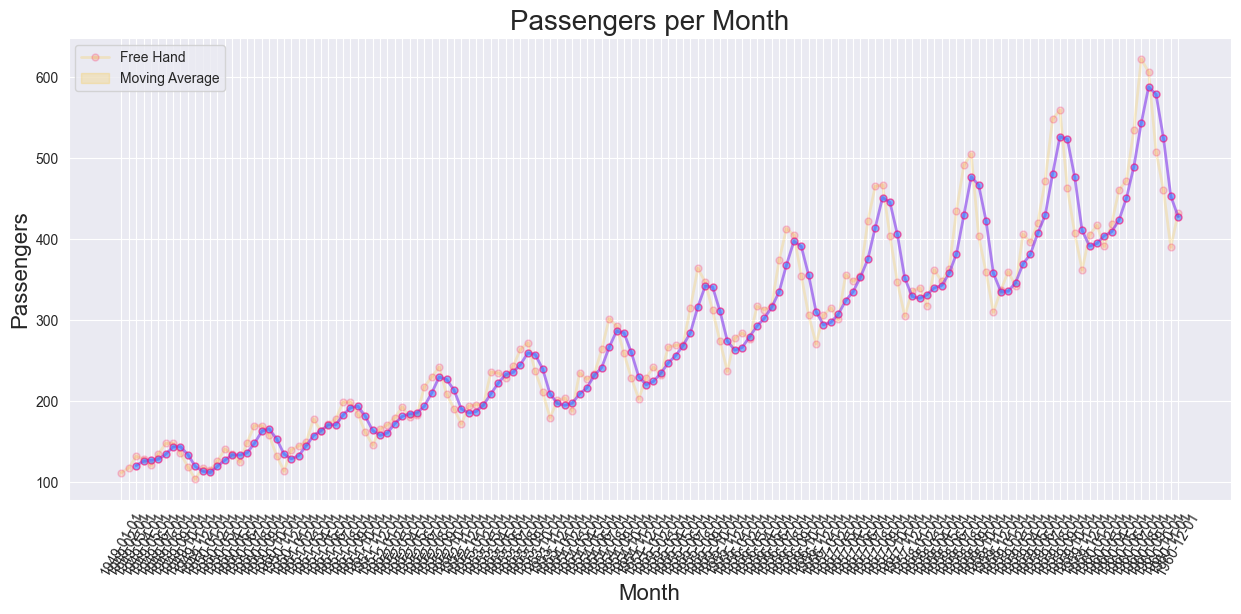

In [110]:
plt.figure(figsize=(15, 6))

window_size = 3
moving_average = airline_df['Passengers'].rolling(window_size).mean()

sns.lineplot(x=airline_df['Month'].astype(str), y=airline_df['Passengers'], color=colors[0], alpha=0.2, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

sns.lineplot(x=airline_df['Month'].astype(str), y=moving_average, color=colors[3], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[4], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Passengers per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers', fontsize=16)

plt.legend(['Free Hand', 'Moving Average'])

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">2.2.3. Semi-Average Method</div>

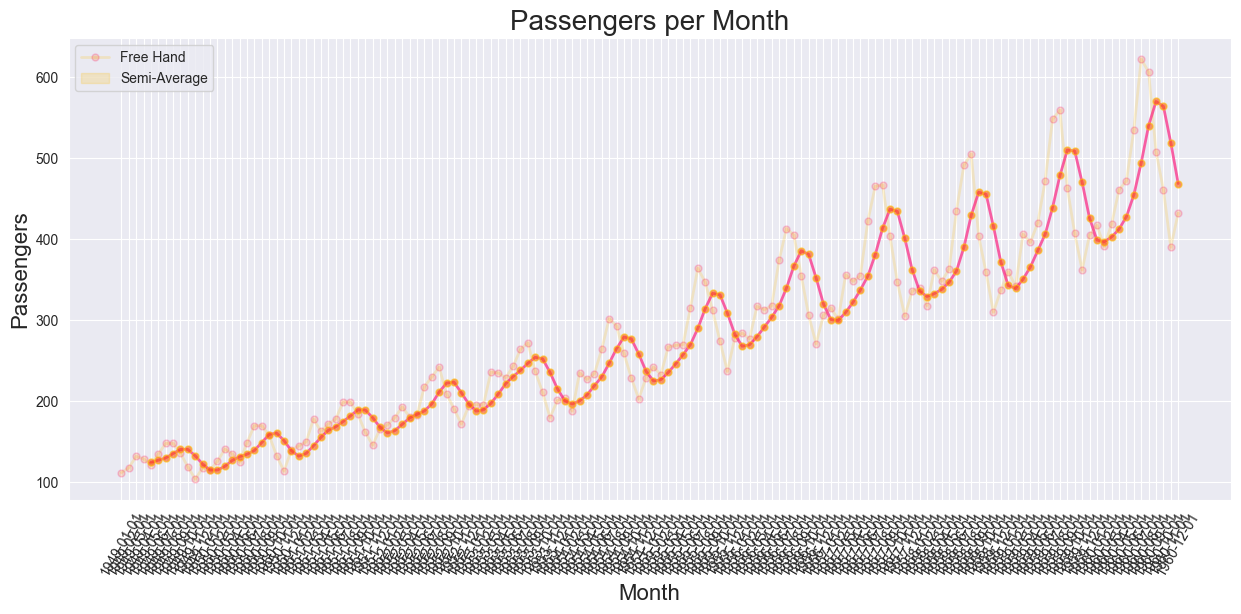

In [111]:
plt.figure(figsize=(15, 6))

window_size = 3
semi_average = airline_df['Passengers'].rolling(window_size).mean().rolling(window_size).mean()

sns.lineplot(x=airline_df['Month'].astype(str), y=airline_df['Passengers'], color=colors[0], alpha=0.2, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

sns.lineplot(x=airline_df['Month'].astype(str), y=semi_average, color=colors[2], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[0], linewidth=2)

plt.title('Passengers per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers', fontsize=16)

plt.legend(['Free Hand', 'Semi-Average'])

plt.xticks(rotation=60)

plt.show()

### <div class="text" style="font-family: 'Inria Serif'; font-size:18px">2.2.4. Least Square Method</div>

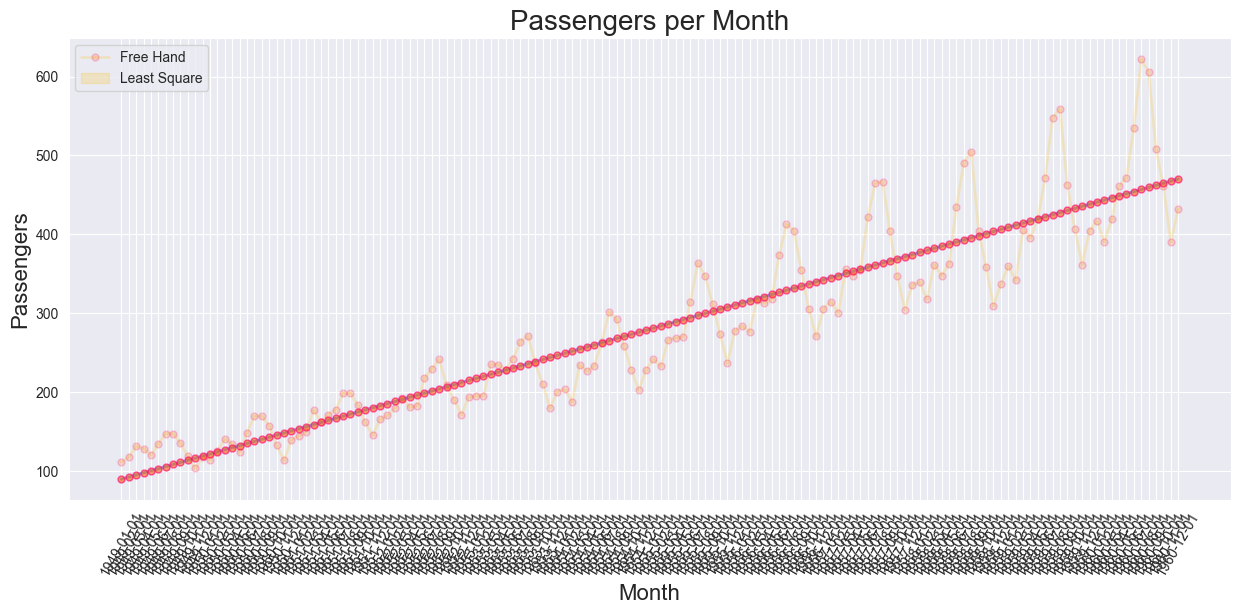

In [112]:
plt.figure(figsize=(15, 6))

x = np.arange(1, len(airline_df) + 1)
y = airline_df['Passengers']

m, b = np.polyfit(x, y, 1)

sns.lineplot(x=airline_df['Month'].astype(str), y=airline_df['Passengers'], color=colors[0], alpha=0.2, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

sns.lineplot(x=airline_df['Month'].astype(str), y=m*x + b, color=colors[4], alpha=0.6, marker='o', markersize=5, markerfacecolor=colors[1], markeredgewidth=1, markeredgecolor=colors[2], linewidth=2)

plt.title('Passengers per Month', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers', fontsize=16)

plt.legend(['Free Hand', 'Least Square'])

plt.xticks(rotation=60)

plt.show()